In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
import numpy as np
import requests
from scipy.stats import linregress
from scipy.optimize import minimize
import scipy.stats as stats

#Import data files
AZ_Employment ="EMPLOYAZ.csv"
AZ_Assets = "AZTAST.csv"
CA_Employment = "EMPLOYCA.csv"
CA_Assets = "CATAST.csv"
FL_Employment ="EMPLOYFL.csv"
FL_Assets = "FLTAST.csv"
TX_Employment = "EMPLOYTX.csv"
TX_Assets = "TXTAST.csv"
NY_Employment = "EMPLOYNY.csv"
NY_Assets = "NYTAST.csv"
Total_Assets_US = "Total_Assets_US.csv"
Women_Employ = "Women_Employ.csv"
Men_Employ = "Men_Employ.csv"

# Read the State data
AZ_Employment = pd.read_csv(AZ_Employment)
AZ_Assets = pd.read_csv(AZ_Assets)
CA_Employment = pd.read_csv(CA_Employment)
CA_Assets = pd.read_csv(CA_Assets)
FL_Employment = pd.read_csv(FL_Employment)
FL_Assets = pd.read_csv(FL_Assets)
TX_Employment = pd.read_csv(TX_Employment)
TX_Assets = pd.read_csv(TX_Assets)
NY_Employment = pd.read_csv(NY_Employment)
NY_Assets = pd.read_csv(NY_Assets)

#Read the National data
Total_Assets_US = pd.read_csv(Total_Assets_US)
Women_Employ = pd.read_csv(Women_Employ)
Men_Employ = pd.read_csv(Men_Employ)

In [2]:
#Merge the States together into a dataset
States_List = [AZ_Employment, AZ_Assets, CA_Employment, CA_Assets, FL_Employment, FL_Assets, TX_Employment, TX_Assets, NY_Employment, NY_Assets]

States_merge = reduce(lambda left,right: pd.merge(left,right, on=['DATE'], how = 'inner'), States_List)

States_merge

,DATE,EMPLOYAZ,AZTAST,EMPLOYCA,CATAST,EMPLOYFL,FLTAST,EMPLOYTX,TXTAST,EMPLOYNY,NYTAST
0,2003-10-01,2493500,59954040,16400900,481215482,7590500,79300763,10240300,136451478,8852700,1595462417
1,2004-01-01,2526500,48952480,16407400,238540573,7663400,83252891,10252900,139942740,8809300,1649741972
2,2004-04-01,2552400,52303555,16443500,247023538,7761500,83598300,10238400,143958082,8768400,1719407226
3,2004-07-01,2587300,54849392,16519800,251607057,7876300,84439096,10258300,147233210,8813800,1622308586
4,2004-10-01,2619200,58624495,16577400,265813575,7997000,89237569,10303200,151466947,8870400,1010074345
...,...,...,...,...,...,...,...,...,...,...,...
63,2019-07-01,3350100,30967945,18668000,829080767,9971900,159226527,13522000,421325663,9165900,992381163
64,2019-10-01,3373500,31210017,18641800,843262929,10031800,159637990,13587700,427337046,9115100,1016532907
65,2020-01-01,3409600,33172435,18617800,887064433,10064600,171058455,13601700,441327746,9146200,1158796858
66,2020-04-01,3351000,36608281,17905500,946663218,9676200,195899873,13273200,485454404,8772000,1188428456


In [3]:
#Determine data types columns
States_merge.dtypes

DATE        object
EMPLOYAZ     int64
AZTAST       int64
EMPLOYCA     int64
CATAST       int64
EMPLOYFL     int64
FLTAST       int64
EMPLOYTX     int64
TXTAST       int64
EMPLOYNY     int64
NYTAST       int64
dtype: object

In [4]:
States_merge.columns

Index(['DATE', 'EMPLOYAZ', 'AZTAST', 'EMPLOYCA', 'CATAST', 'EMPLOYFL',
       'FLTAST', 'EMPLOYTX', 'TXTAST', 'EMPLOYNY', 'NYTAST'],
      dtype='object')

<Axes: xlabel='CATAST', ylabel='EMPLOYNY'>

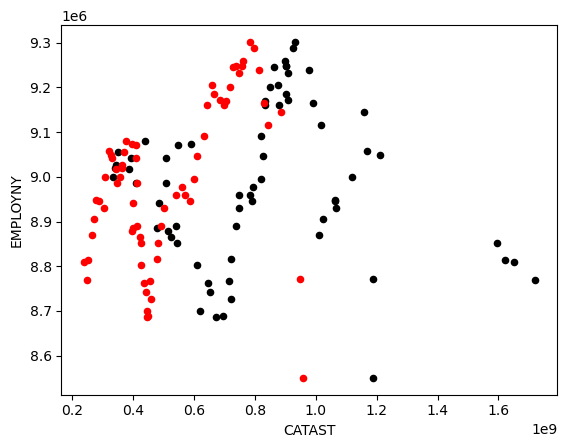

In [38]:
ax = States_merge.plot(kind="scatter",x="NYTAST", y="EMPLOYNY", color="Black")

States_merge.plot(kind="scatter",x="CATAST", y="EMPLOYNY", color="Red", ax=ax)

In [35]:
#Define linear regression function
def plot_linear_regression(x, y, title, y_label, annotate_pos):
    
    #Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x,y)
    regression = x * slope +intercept
    
    #Equation of line
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    #Scatterplot and regression line
    plt.scatter(x,y, c="#e377c2")
    plt.plot(x, regression, "r")
    
    #Annotate text for line
    plt.annotate(line_eq, annotate_pos, fontsize = 12, color = "navy")
    plt.title(title)
    plt.xlabel('Level of Employment')
    plt.ylabel(y_label)
    plt.show()

    #Print R value and P value 
    print(f"R value is {rvalue}")
    print(f"P value is {pvalue}")

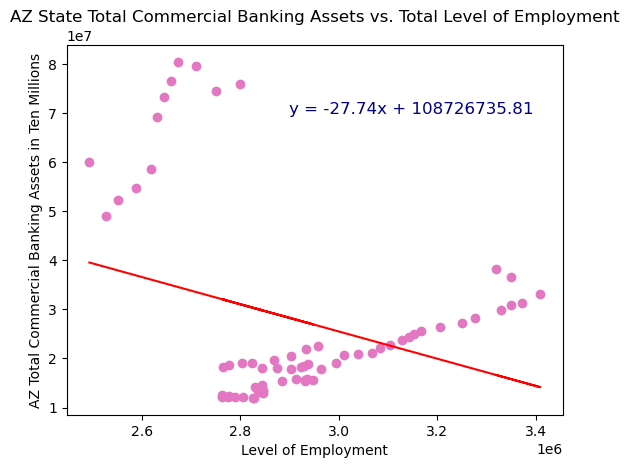

R value is -0.30311500186897294
P value is 0.011983656537610363


In [36]:
# Linear regression on AZ data
x = States_merge["EMPLOYAZ"]
y = States_merge["AZTAST"]

#Call line function
plot_linear_regression(x, y,"AZ State Total Commercial Banking Assets vs. Total Level of Employment", "AZ Total Commercial Banking Assets in Ten Millions", (2900000,70000000))

R value is 0.8001534156760312
P value is 2.704184736795247e-16


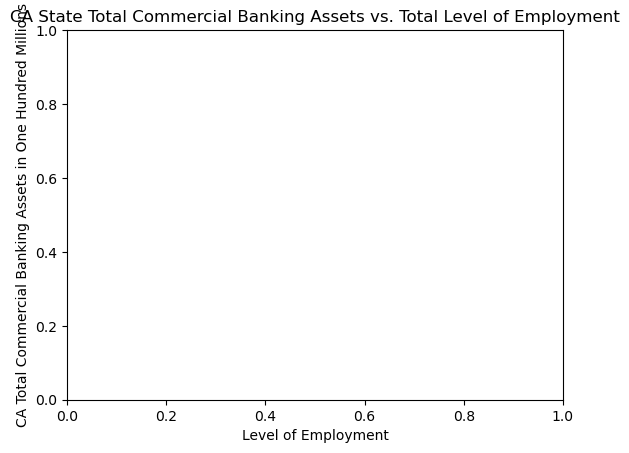

In [33]:
# Linear regression on CA data
x = States_merge["EMPLOYCA"]
y = States_merge["CATAST"]

#Call line function
plot_linear_regression(x, y,"CA State Total Commercial Banking Assets vs. Total Level of Employment", "CA Total Commercial Banking Assets in One Hundred Millions", (16000000,900000000))

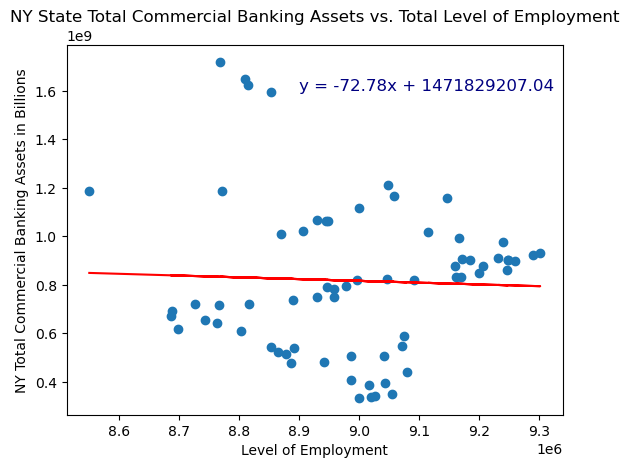

R value is -0.04012966590138515
P value is 0.7452465679249458


In [8]:
# Linear regression on NY data
x = States_merge["EMPLOYNY"]
y = States_merge["NYTAST"]

#Call line function
plot_linear_regression(x, y,"NY State Total Commercial Banking Assets vs. Total Level of Employment", "NY Total Commercial Banking Assets in Billions", (8900000,1600000000))

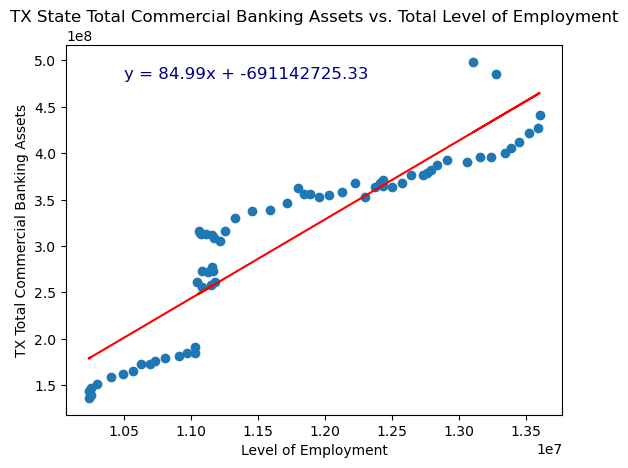

R value is 0.9121406256137612
P value is 2.9130146567754436e-27


In [9]:
# Linear regression on NY data
x = States_merge["EMPLOYTX"]
y = States_merge["TXTAST"]

#Call line function
plot_linear_regression(x, y,"TX State Total Commercial Banking Assets vs. Total Level of Employment", "TX Total Commercial Banking Assets", (10500000,480000000))

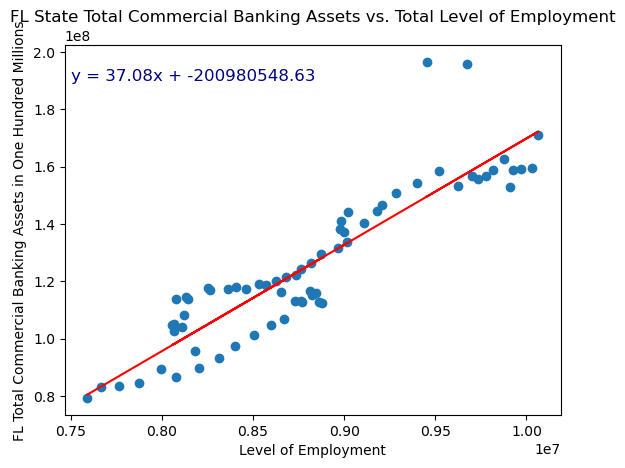

R value is 0.9051649371635826
P value is 3.237038762908953e-26


In [10]:
# Linear regression on NY data
x = States_merge["EMPLOYFL"]
y = States_merge["FLTAST"]

#Call line function
plot_linear_regression(x, y,"FL State Total Commercial Banking Assets vs. Total Level of Employment", "FL Total Commercial Banking Assets in One Hundred Millions", (7500000,190000000))

In [11]:
#Merge the National Data together into a dataset
National_List = [Total_Assets_US, Women_Employ, Men_Employ]

National_merge = reduce(lambda left,right: pd.merge(left,right, on=['DATE'], how = 'inner'), National_List)

National_merge

,DATE,TLAACBW027SBOG,LNS12000002,LNS12000001
0,1973-08-01,764.6927,32828,52376
1,1974-05-01,841.6085,33726,53165
2,1975-01-01,887.2367,33660,51967
3,1975-10-01,906.4436,34372,51998
4,1976-09-01,952.3437,35774,53399
...,...,...,...,...
81,2021-09-01,22028.6766,72294,81573
82,2021-12-01,22603.0749,73501,82580
83,2022-06-01,22718.9232,74031,84026
84,2023-02-01,23052.3260,75049,85266


In [12]:
#Rename columns in National dataset
National_merge.rename(columns ={"TLAACBW027SBOG":"COMM BANKING ASSETS:US", "LNS12000002":"EMPLOYMENT WOMEN:US", "LNS12000001":"EMPLOYMENT MEN:US"},inplace=True)

National_merge

,DATE,COMM BANKING ASSETS:US,EMPLOYMENT WOMEN:US,EMPLOYMENT MEN:US
0,1973-08-01,764.6927,32828,52376
1,1974-05-01,841.6085,33726,53165
2,1975-01-01,887.2367,33660,51967
3,1975-10-01,906.4436,34372,51998
4,1976-09-01,952.3437,35774,53399
...,...,...,...,...
81,2021-09-01,22028.6766,72294,81573
82,2021-12-01,22603.0749,73501,82580
83,2022-06-01,22718.9232,74031,84026
84,2023-02-01,23052.3260,75049,85266


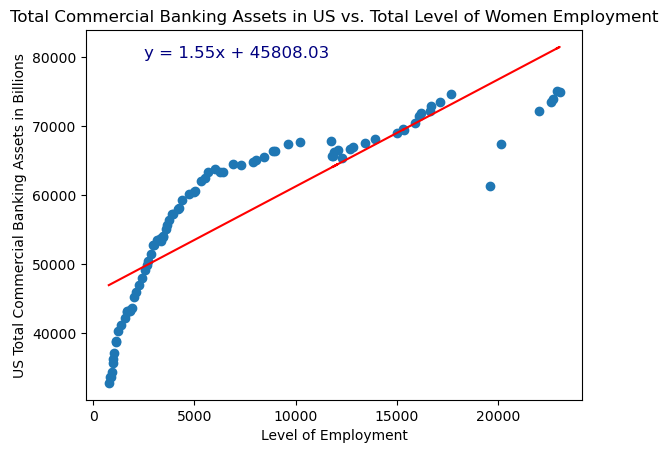

R value is 0.8479553849024549
P value is 7.112282210276378e-25


In [13]:
# Linear regression on National Women data
x = National_merge["COMM BANKING ASSETS:US"]
y = National_merge["EMPLOYMENT WOMEN:US"]

#Call line function
plot_linear_regression(x, y,"Total Commercial Banking Assets in US vs. Total Level of Women Employment", "US Total Commercial Banking Assets in Billions", (2500,80000))

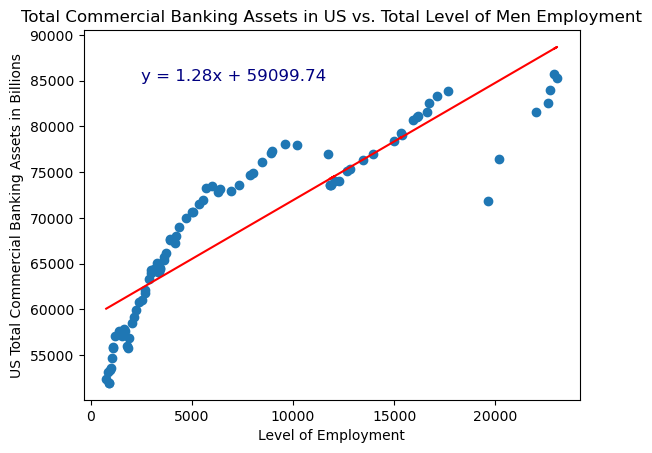

R value is 0.8856907705348259
P value is 9.977534423848985e-30


In [14]:
# Linear regression on National Men data
x = National_merge["COMM BANKING ASSETS:US"]
y = National_merge["EMPLOYMENT MEN:US"]

#Call line function
plot_linear_regression(x, y,"Total Commercial Banking Assets in US vs. Total Level of Men Employment", "US Total Commercial Banking Assets in Billions", (2500,85000))

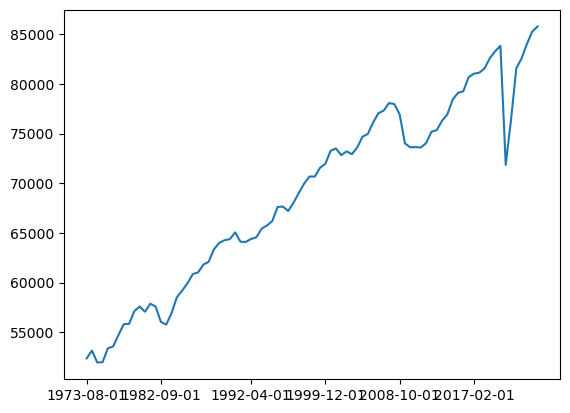

In [15]:
#Line plot for US Men Employment Level over Time

import  matplotlib.dates as mdates

plt.plot(National_merge["DATE"],National_merge['EMPLOYMENT MEN:US'])

ax=plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.show()

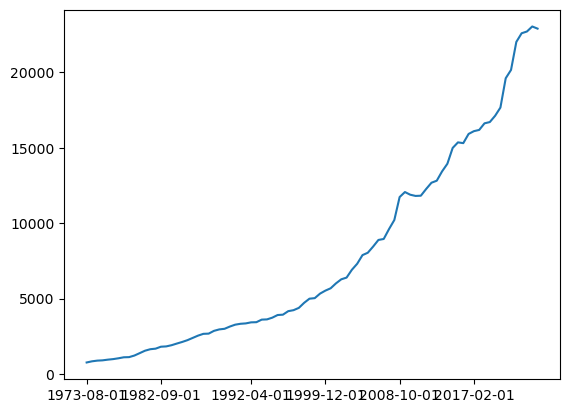

In [16]:
#Line plot for Commercial Banking Assets over Time

import  matplotlib.dates as mdates

plt.plot(National_merge["DATE"],National_merge['COMM BANKING ASSETS:US'])

ax=plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.show()

<Axes: >

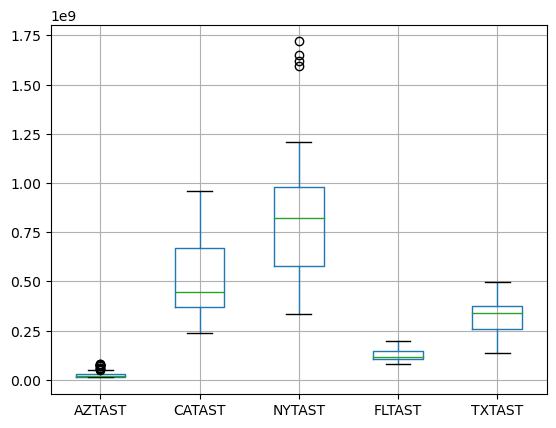

In [17]:
States_merge.boxplot(column=['AZTAST', 'CATAST', 'NYTAST', 'FLTAST', 'TXTAST'])


<Axes: >

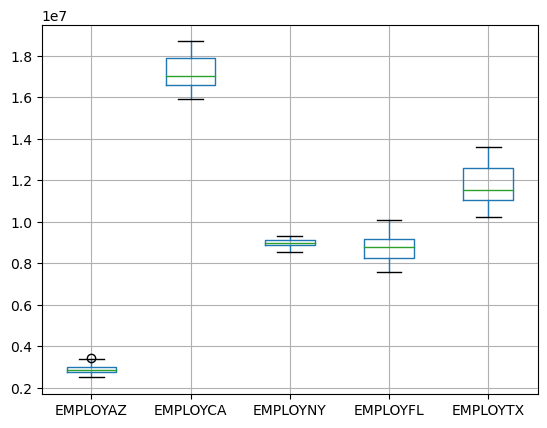

In [18]:
States_merge.boxplot(column=['EMPLOYAZ', 'EMPLOYCA', 'EMPLOYNY', 'EMPLOYFL', 'EMPLOYTX'])

In [19]:
# Perform the ANOVA on the mean of States Commercial Banking Assets
stats.f_oneway(States_merge['AZTAST'], States_merge['CATAST'],States_merge['NYTAST'],States_merge['TXTAST'],
               States_merge['FLTAST'])

F_onewayResult(statistic=234.84896316886048, pvalue=7.972398638419603e-96)

In [20]:
# Perform the ANOVA on the mean of States Level of Employment
stats.f_oneway(States_merge['EMPLOYAZ'], States_merge['EMPLOYCA'],States_merge['EMPLOYNY'],States_merge['EMPLOYTX'],
               States_merge['EMPLOYFL'])

F_onewayResult(statistic=4176.631224579706, pvalue=2.4286698682337373e-284)